# Graphs for Diverse Led Funds

### Import Data

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'


In [54]:
df = pd.read_csv(
    "../00_source_data/Corporate Investments in Diverse Led Funds - Top 100 VC.csv",
    header=7,
    index_col=0,
)
df.reset_index(inplace=True, drop=True)

In [55]:
df.sample(5)


,VC Firm,Claim to support Diversity?,Metrics (least 1-5 best) based on websites,Diversity Investment Count,Total Investment Count,DIP: Diversity Investment Percentage,"Rank (1, highest DIP)",Website,Contact Information,Response?,...,Stages,Founded Year,Name of Founders,# of Investments,# of Exits,Min Check Size,Max Check Size,Funds Raised,Unnamed: 22,Unnamed: 23
2,500 Startups,"States they will ""actively seek to increase th...",5,513.0,3063.0,16.75%,19,https://500.co/,info@500startups.com,NaN,...,"Early Stage, Seed",2010,"Christine Tsai, Dave Mcclure",2600,339.0,"$50,000","$250,000","$67,000,000,000",NaN,NaN
59,Slow,Does not specify,1,144.0,538.0,26.77%,1,https://slow-prod.herokuapp.com/,NaN,NaN,...,Early Stage,2011,Kevin Colleran,566,203.0,"$500,000","$3,000,000","$325,000,000",NaN,NaN
36,Innovation Works,Yes with in depth detail,5,146.0,558.0,26.16%,3,https://innovationworks.org,info@innovationworks.org,NaN,...,Seed,1999,Lisa Greenleaf,729,77.0,"$50,000","$150,000","$3,300,000,000",NaN,NaN
7,Sequoia Capital,Does not specify,1,207.0,1814.0,11.41%,51,https://sequoiacap.com,info@sequoiacap.com,NaN,...,"Early Stage, Seed, Growth",1972,"Aadit Palicha, Bill Coughran, Don Valentine, S...",1712,350.0,"$100,000","$1,000,000","$22,000,000,000",NaN,NaN
24,First Round Capital,Does not specify,1,199.0,881.0,22.59%,6,https://firstround.com/,info@firstround.com,NaN,...,"Seed, Early Stage, Series A",2004,"Howard Morgan, Josh Kopelman, Todd Jackson",854,189.0,"$750,000","$4,000,000","$738,000,000",NaN,NaN


In [56]:
# change column names
df.rename(
    columns={"Metrics (least 1-5 best) based on websites": "Metrics"},
    inplace=True,
)


In [57]:
# change DIP: Diversity Investment Percentage to float
df["DIP: Diversity Investment Percentage"] = (
    df["DIP: Diversity Investment Percentage"]
    .str.replace("%", "")
    .astype(float)
)

In [58]:
# drop if DIP: Diversity Investment Percentage is NaN
df = df[~df["DIP: Diversity Investment Percentage"].isna()]


### Create Graphs

#### Graph 1: Total investment count for top 100 VC firms

In [59]:
df_sorted = df.sort_values(by="Total Investment Count", ascending=False)
# fill na with 0
# df_sorted["Total Investment Count"] = df_sorted["Total Investment Count"].fillna(0)

In [60]:
df_sorted.describe()


,Metrics,Diversity Investment Count,Total Investment Count,DIP: Diversity Investment Percentage,Response?,Founded Year,# of Investments,# of Exits,Unnamed: 22
count,91.000000,91.000000,91.000000,91.000000,0.0,91.000000,91.000000,91.000000,0.0
mean,1.868132,117.604396,894.681319,11.743516,NaN,1995.208791,865.296703,174.956044,NaN
std,1.423679,162.914966,894.303949,6.995945,NaN,16.553963,686.246870,136.706410,NaN
min,1.000000,0.000000,3.000000,0.000000,NaN,1911.000000,385.000000,3.000000,NaN
25%,1.000000,41.500000,443.000000,7.070000,NaN,1985.000000,472.000000,90.000000,NaN
50%,1.000000,80.000000,646.000000,12.750000,NaN,2000.000000,661.000000,145.000000,NaN
75%,2.000000,139.500000,970.000000,15.875000,NaN,2007.000000,900.000000,200.000000,NaN
max,5.000000,1140.000000,5538.000000,26.770000,NaN,2016.000000,4469.000000,951.000000,NaN


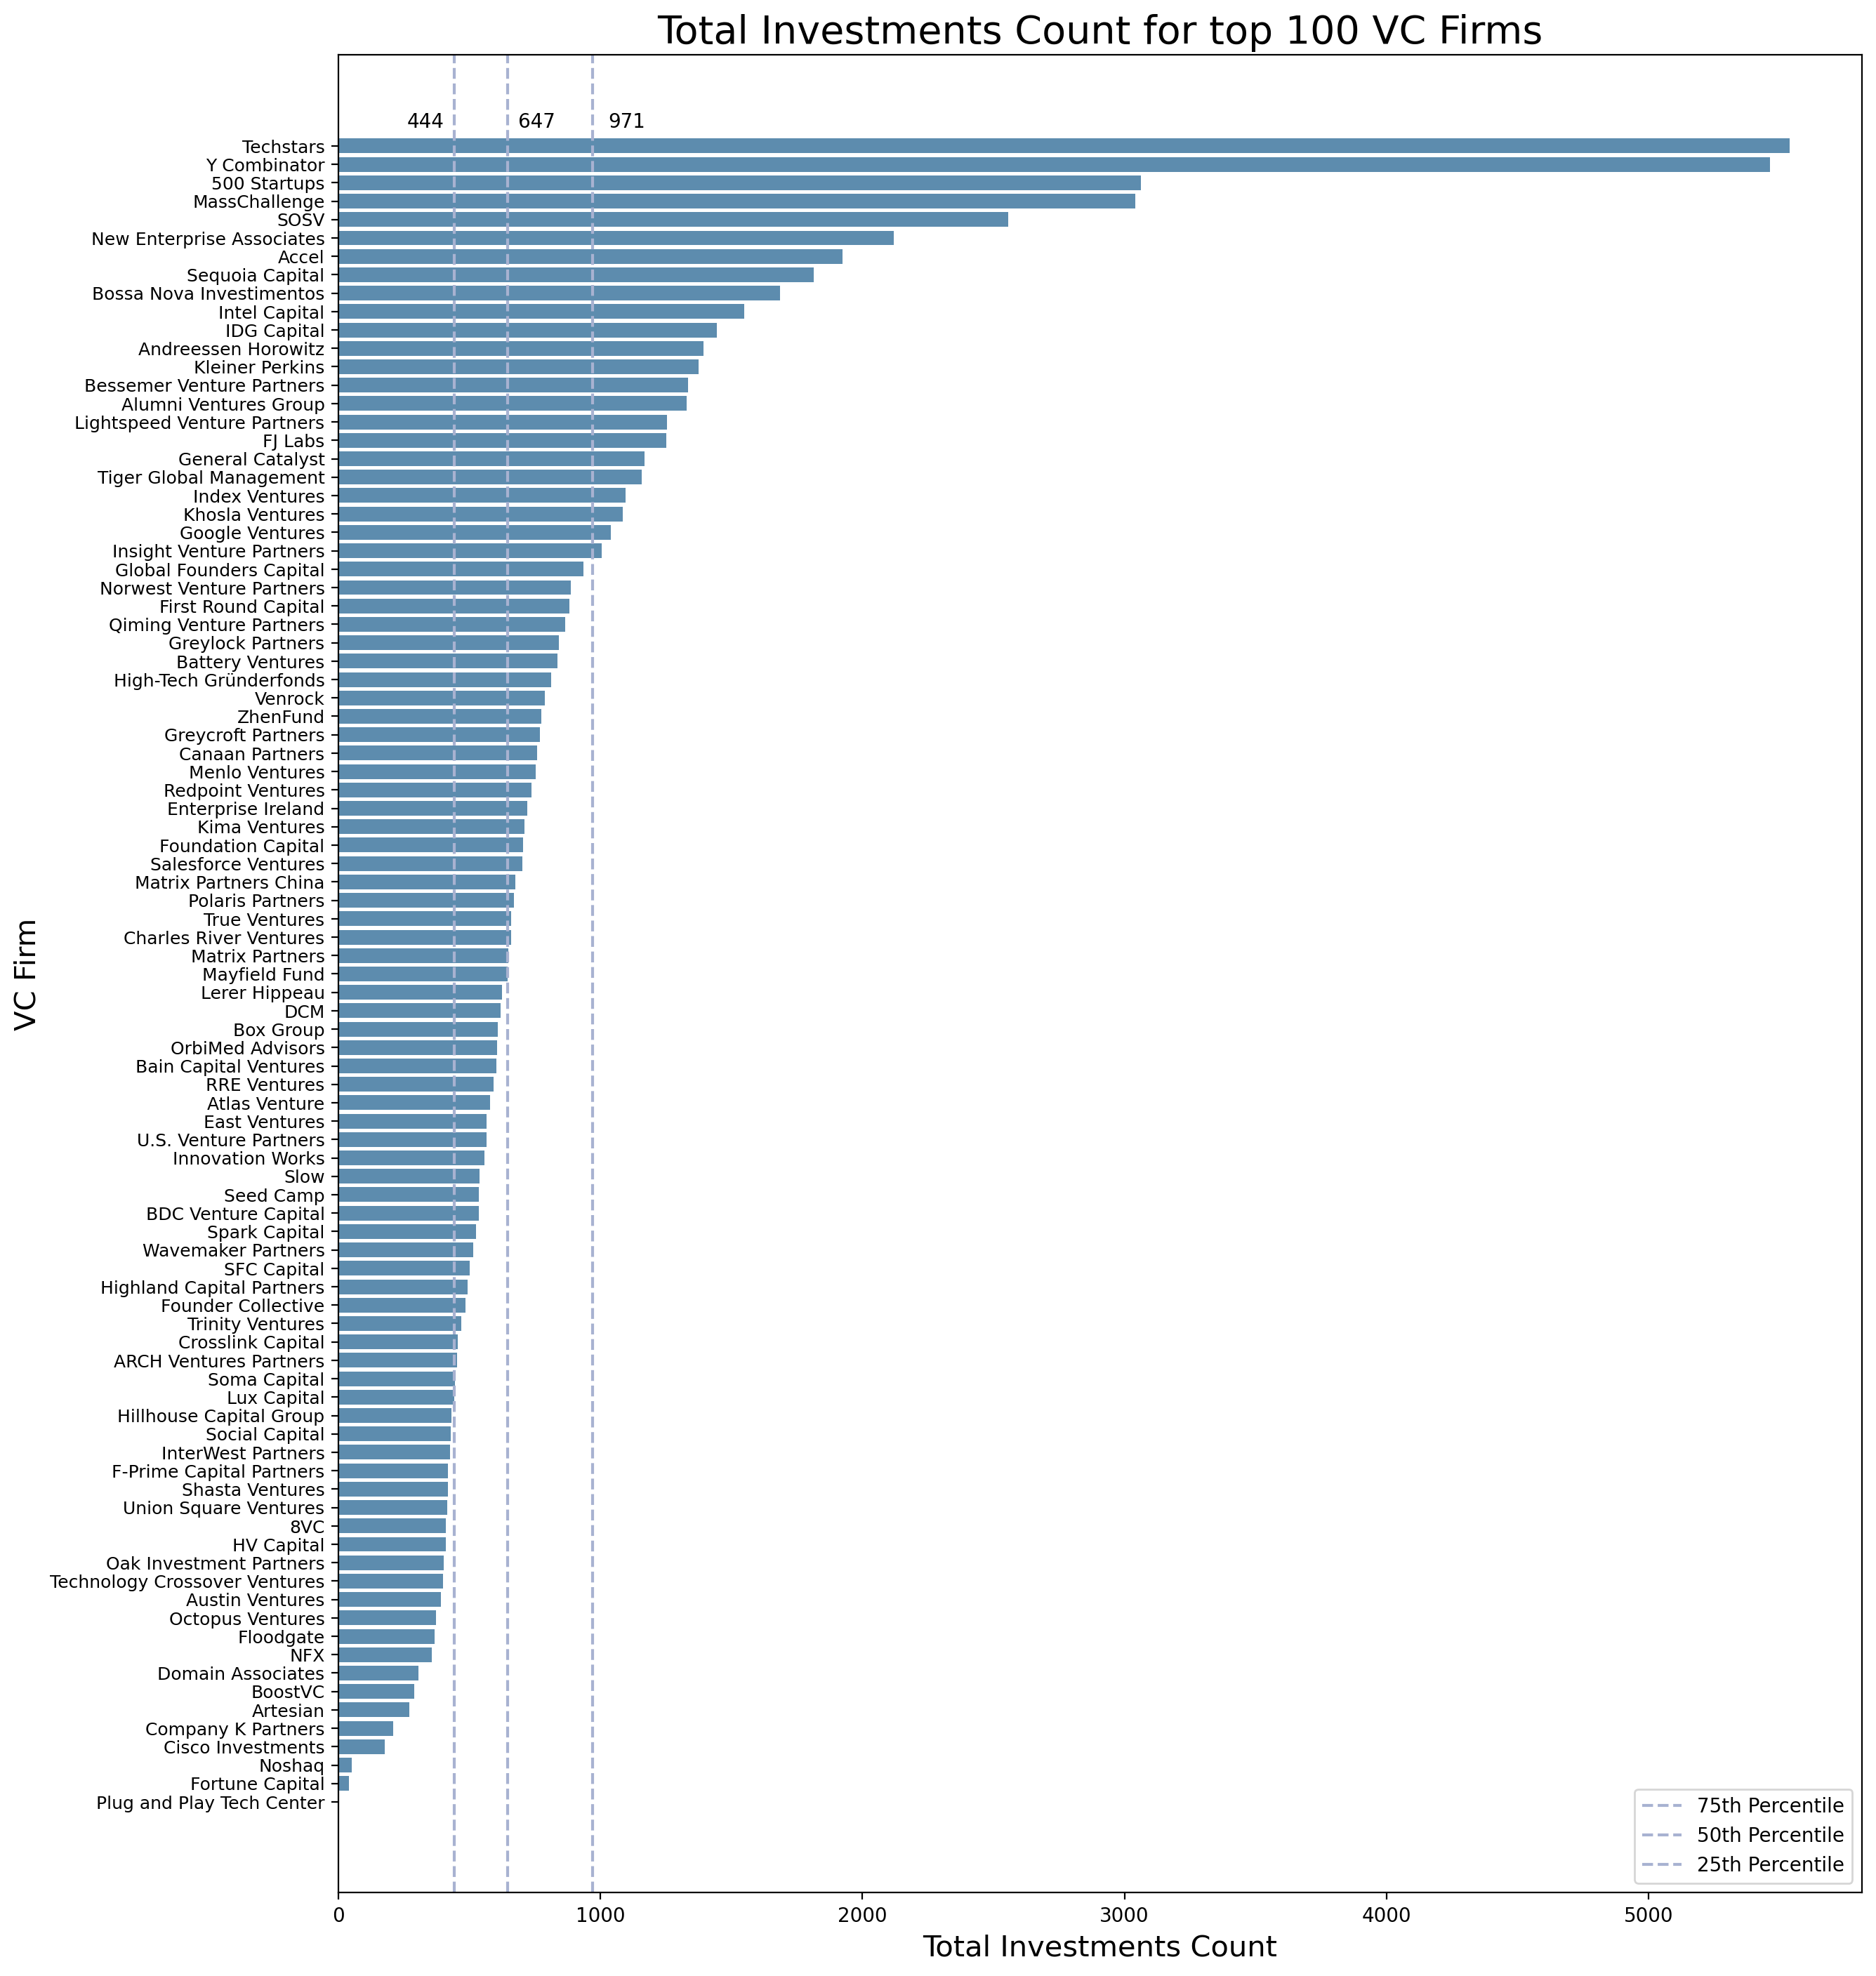

In [61]:
# create a bar chart of total investments count
fig, ax = plt.subplots(figsize=(14, 17))
ax.barh(
    df_sorted["VC Firm"], df_sorted["Total Investment Count"], color="#5D8CAE"
)
ax.set_title("Total Investments Count for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Total Investments Count", fontsize=15)
ax.tick_params(axis="y", labelsize=9)
pv_75 = np.percentile(df_sorted["Total Investment Count"], 75)
pv_50 = np.percentile(df_sorted["Total Investment Count"], 50)
pv_25 = np.percentile(df_sorted["Total Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75) + 1),
    xy=(pv_75 + 130, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1),
    xy=(pv_50 + 110, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1),
    xy=(pv_25 - 110, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()


In [62]:
# save the figure
fig.savefig(
    "../30_results/Total Investments Count for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)

#### Graph 2: Diversity investment count for top 100 VC firms

In [63]:
# sort by Diversity Investment Count
df_sorted_di = df.sort_values(by="Diversity Investment Count", ascending=False)
# fill nan in Diversity Investment Count with 0
df_sorted_di["Diversity Investment Count"] = df_sorted_di[
    "Diversity Investment Count"
].fillna(0)


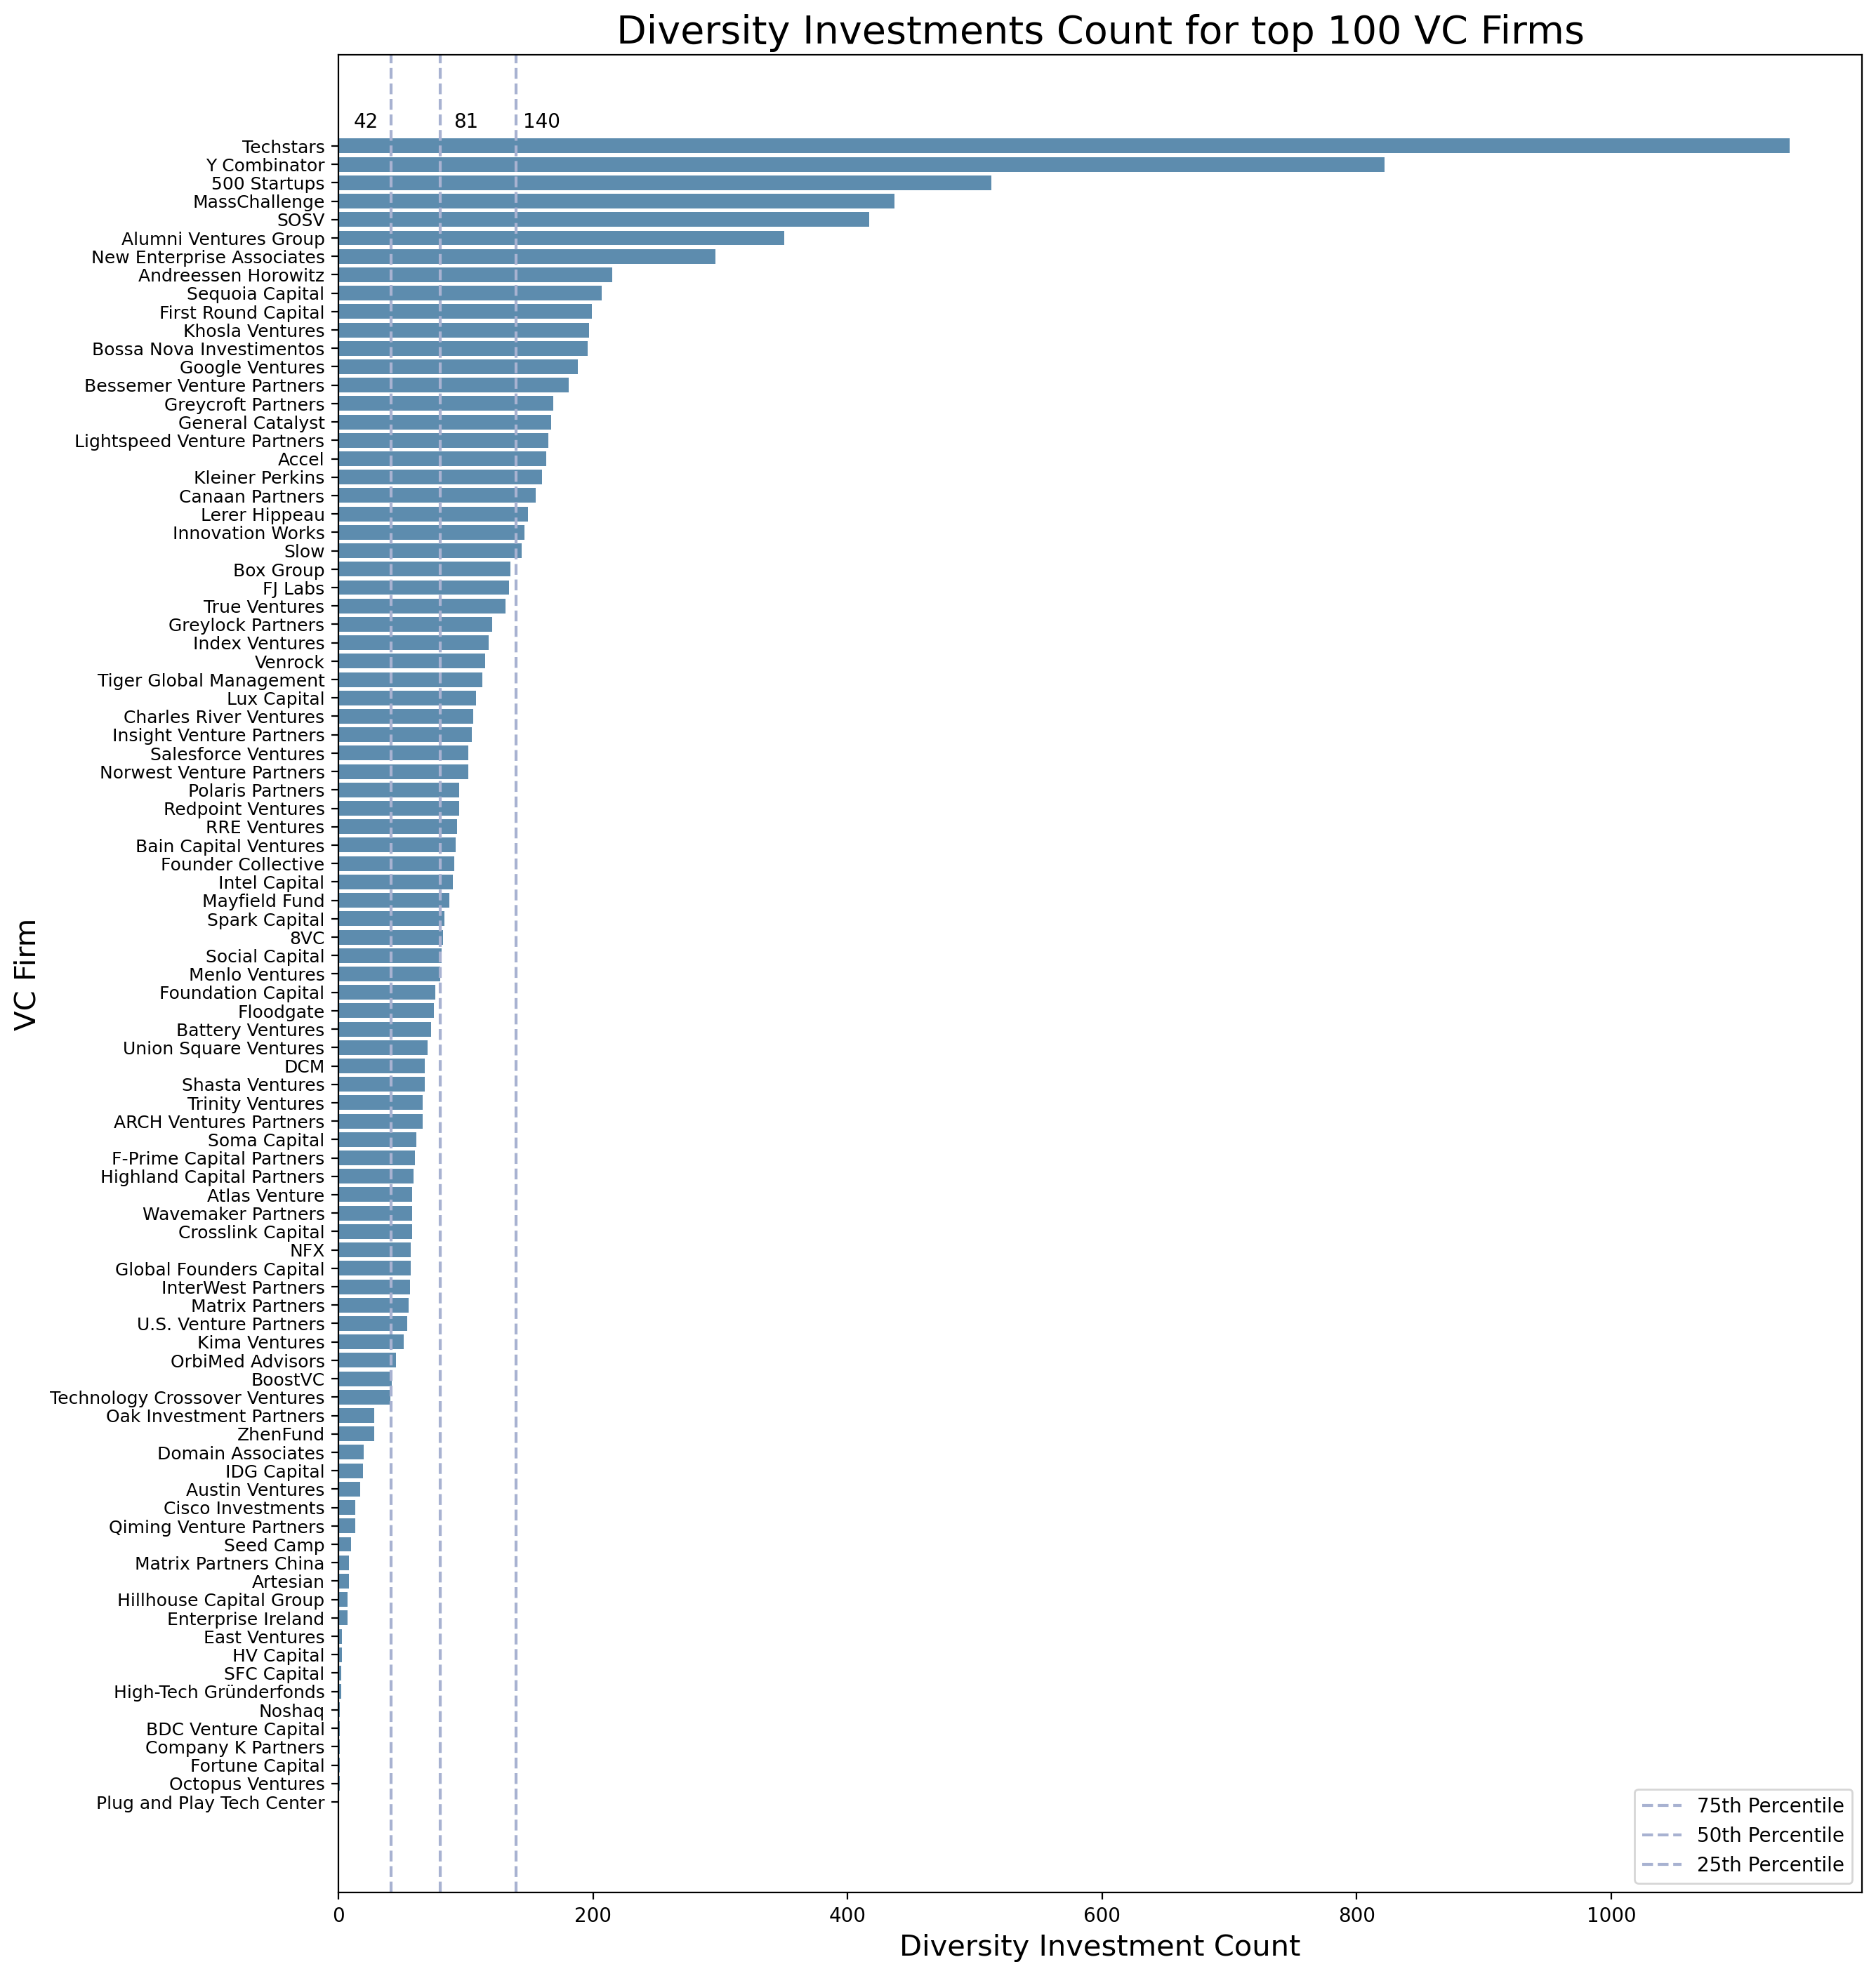

In [64]:
# create a bar chart of diversity investments count
fig, ax = plt.subplots(figsize=(14, 17))
ax.barh(
    df_sorted_di["VC Firm"],
    df_sorted_di["Diversity Investment Count"],
    color="#5D8CAE",
)
ax.set_title("Diversity Investments Count for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Diversity Investment Count", fontsize=15)
ax.tick_params(axis="y", labelsize=9)
pv_75 = np.percentile(df_sorted_di["Diversity Investment Count"], 75)
pv_50 = np.percentile(df_sorted_di["Diversity Investment Count"], 50)
pv_25 = np.percentile(df_sorted_di["Diversity Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75) + 1),
    xy=(pv_75 + 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1),
    xy=(pv_50 + 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1),
    xy=(pv_25 - 20, -1),
    ha="center",
    annotation_clip=False,
)
ax.legend()
plt.gca().invert_yaxis()
plt.show()

In [65]:
# save the figure
fig.savefig(
    "../30_results/Diversity Investments Count for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)

#### Graph 3: Diversity investment percentage for top 100 VC firms

In [66]:
# sort by DIP: Diversity Investment Percentage
df_sorted_dip = df.sort_values(
    by="DIP: Diversity Investment Percentage", ascending=False
)
# drop nan
# df_sorted_dip.dropna(inplace=True)

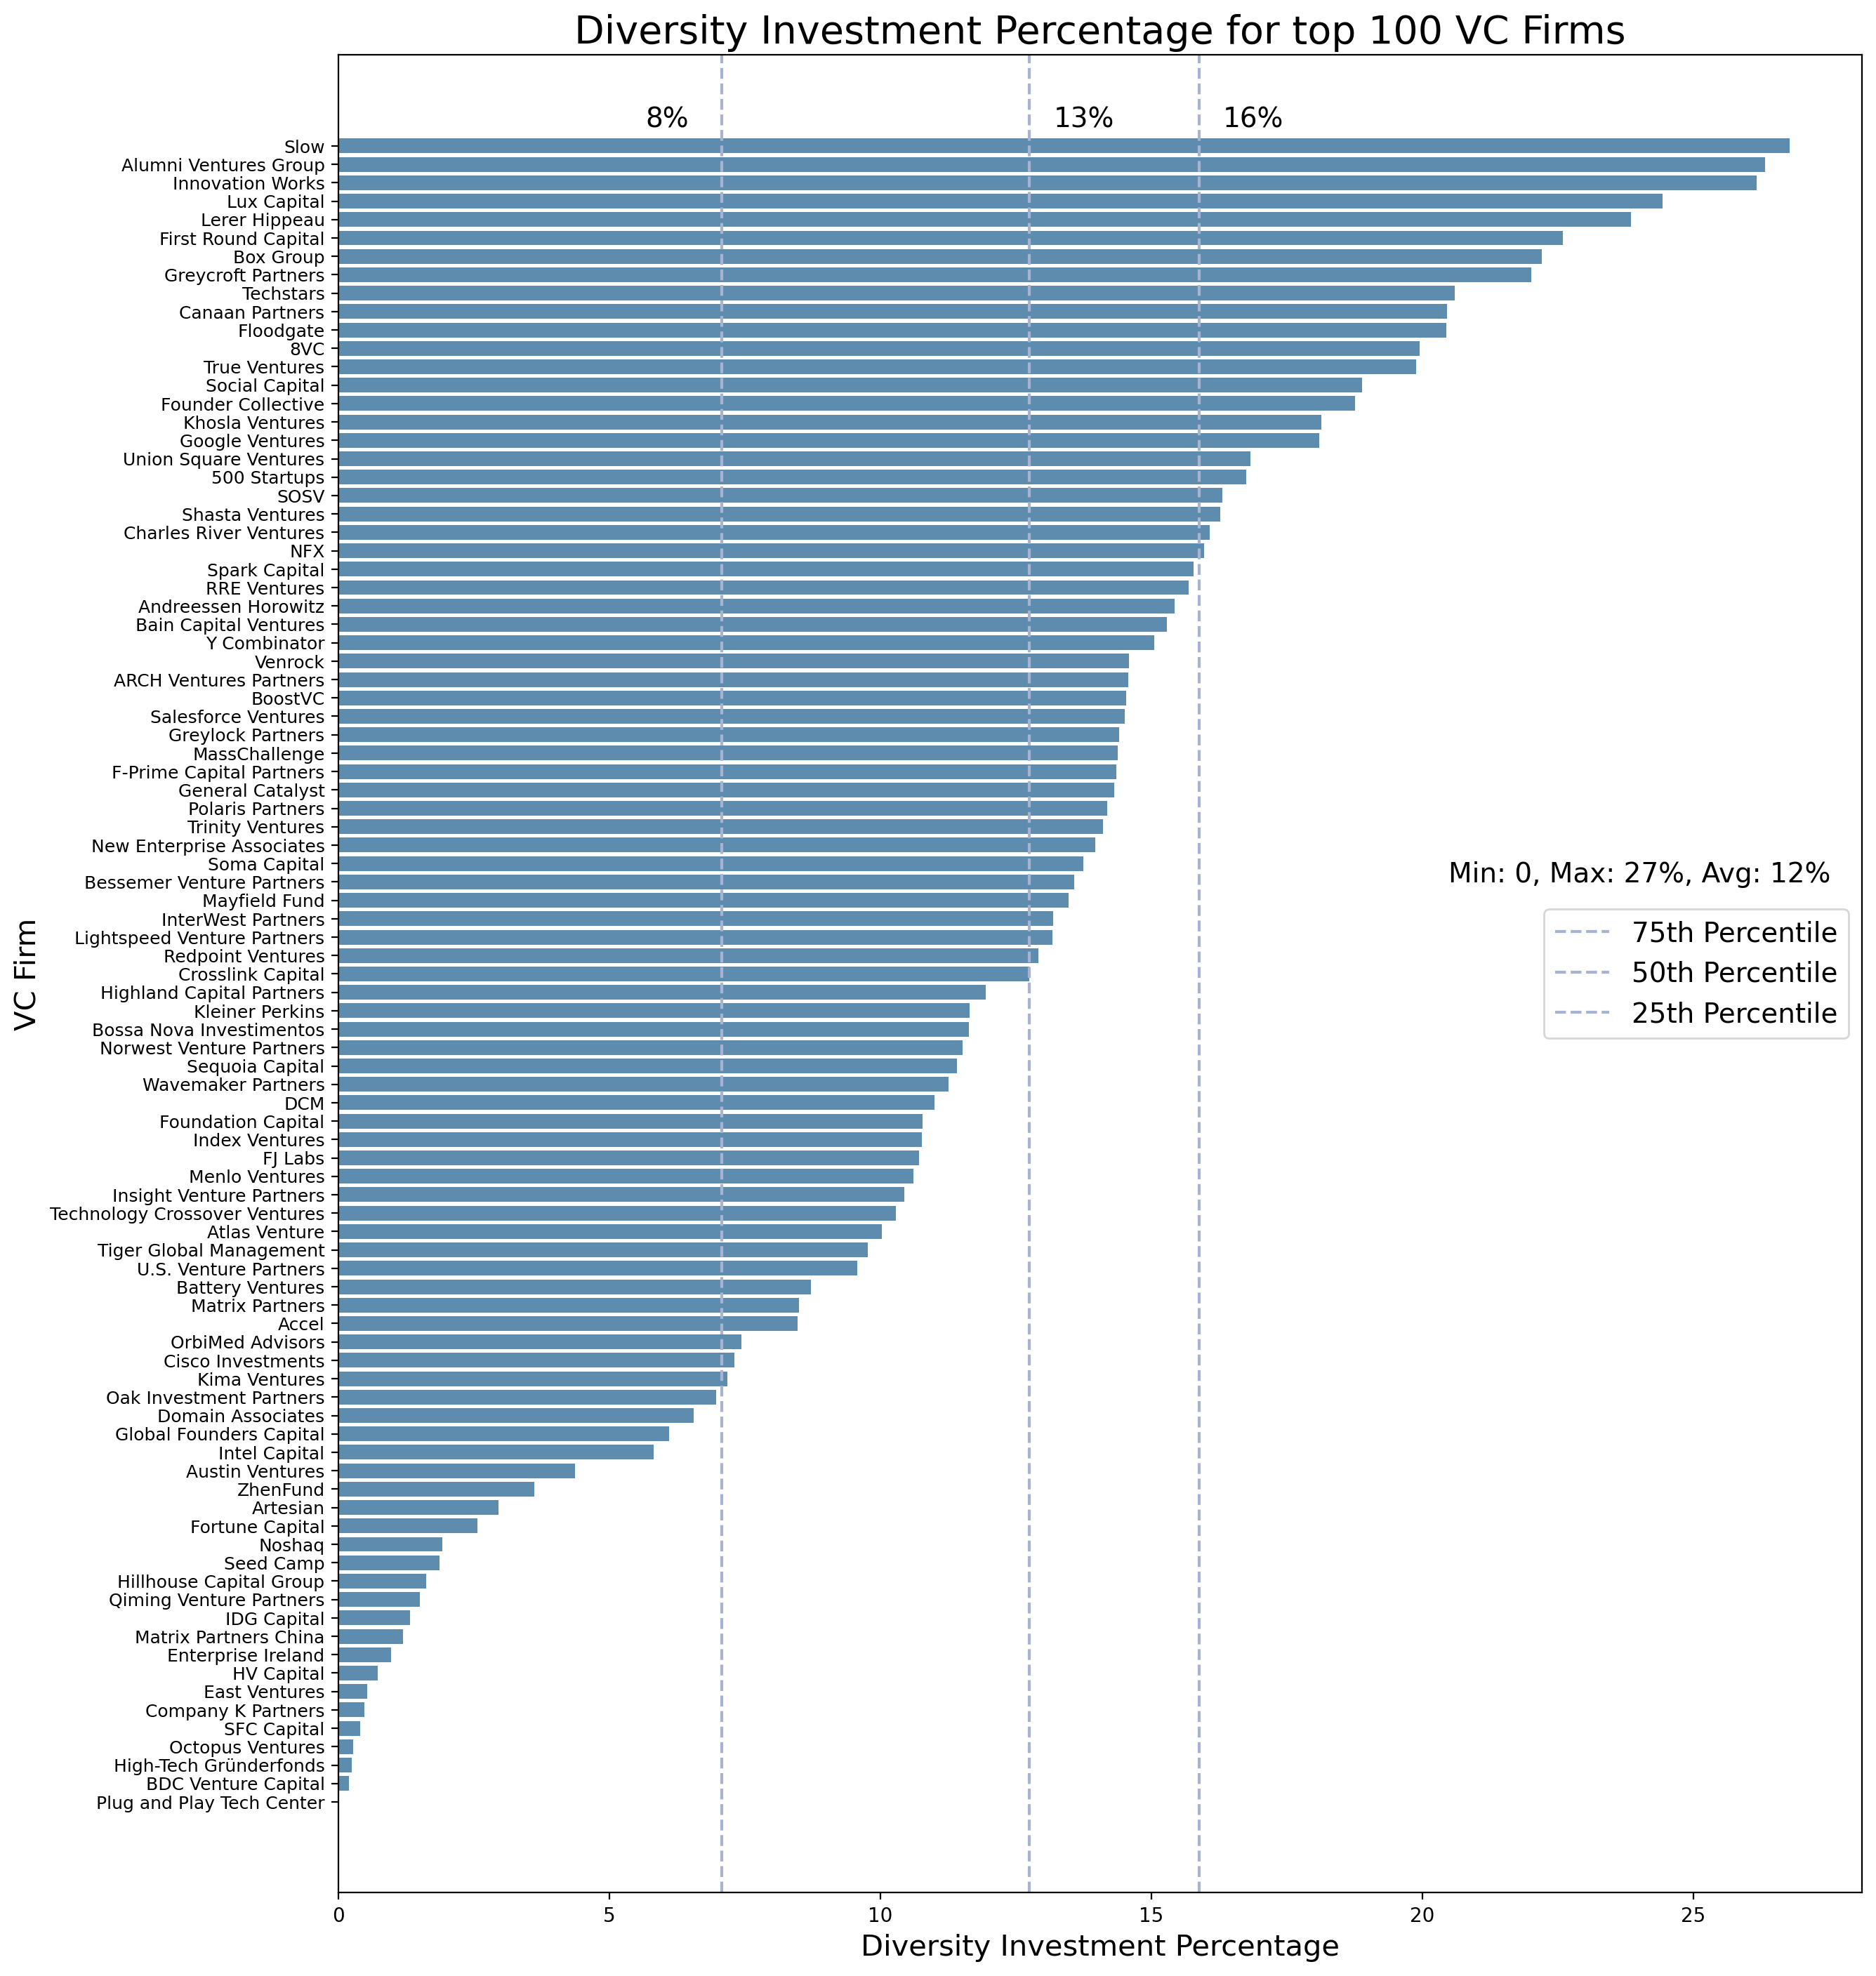

In [67]:
# create a bar chart of diversity investment percentage
fig, ax = plt.subplots(figsize=(14, 17))
ax.barh(
    df_sorted_dip["VC Firm"],
    df_sorted_dip["DIP: Diversity Investment Percentage"],
    color="#5D8CAE",
)
ax.set_title(
    "Diversity Investment Percentage for top 100 VC Firms", fontsize=20
)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Diversity Investment Percentage", fontsize=15)
ax.tick_params(axis="y", labelsize=9)
pv_75 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 75
)
pv_50 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 50
)
pv_25 = np.percentile(
    df_sorted_dip["DIP: Diversity Investment Percentage"], 25
)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--", label="75th Percentile")
ax.annotate(
    str(int(pv_75 + 1)) + "%",
    xy=(pv_75 + 1, -1),
    ha="center",
    annotation_clip=False,
    fontsize=14,
)
ax.axvline(pv_50, color="#A8B2D1", linestyle="--", label="50th Percentile")
ax.annotate(
    str(int(pv_50) + 1) + "%",
    xy=(pv_50 + 1, -1),
    ha="center",
    annotation_clip=False,
    fontsize=14,
)
ax.axvline(pv_25, color="#A8B2D1", linestyle="--", label="25th Percentile")
ax.annotate(
    str(int(pv_25) + 1) + "%",
    xy=(pv_25 - 1, -1),
    ha="center",
    annotation_clip=False,
    fontsize=14,
)
ax.annotate(
    "Min: 0, Max: 27%, Avg: 12%", xy=(24, 40), ha="center", fontsize=14
)
ax.legend(loc="right", fontsize=14)
plt.gca().invert_yaxis()
plt.show()

In [68]:
# save the figure
fig.savefig(
    "../30_results/Diversity Investment Percentage for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)

In [69]:
df_sorted["Nondiversity Investment Count"] = (
    df_sorted["Total Investment Count"]
    - df_sorted["Diversity Investment Count"]
)


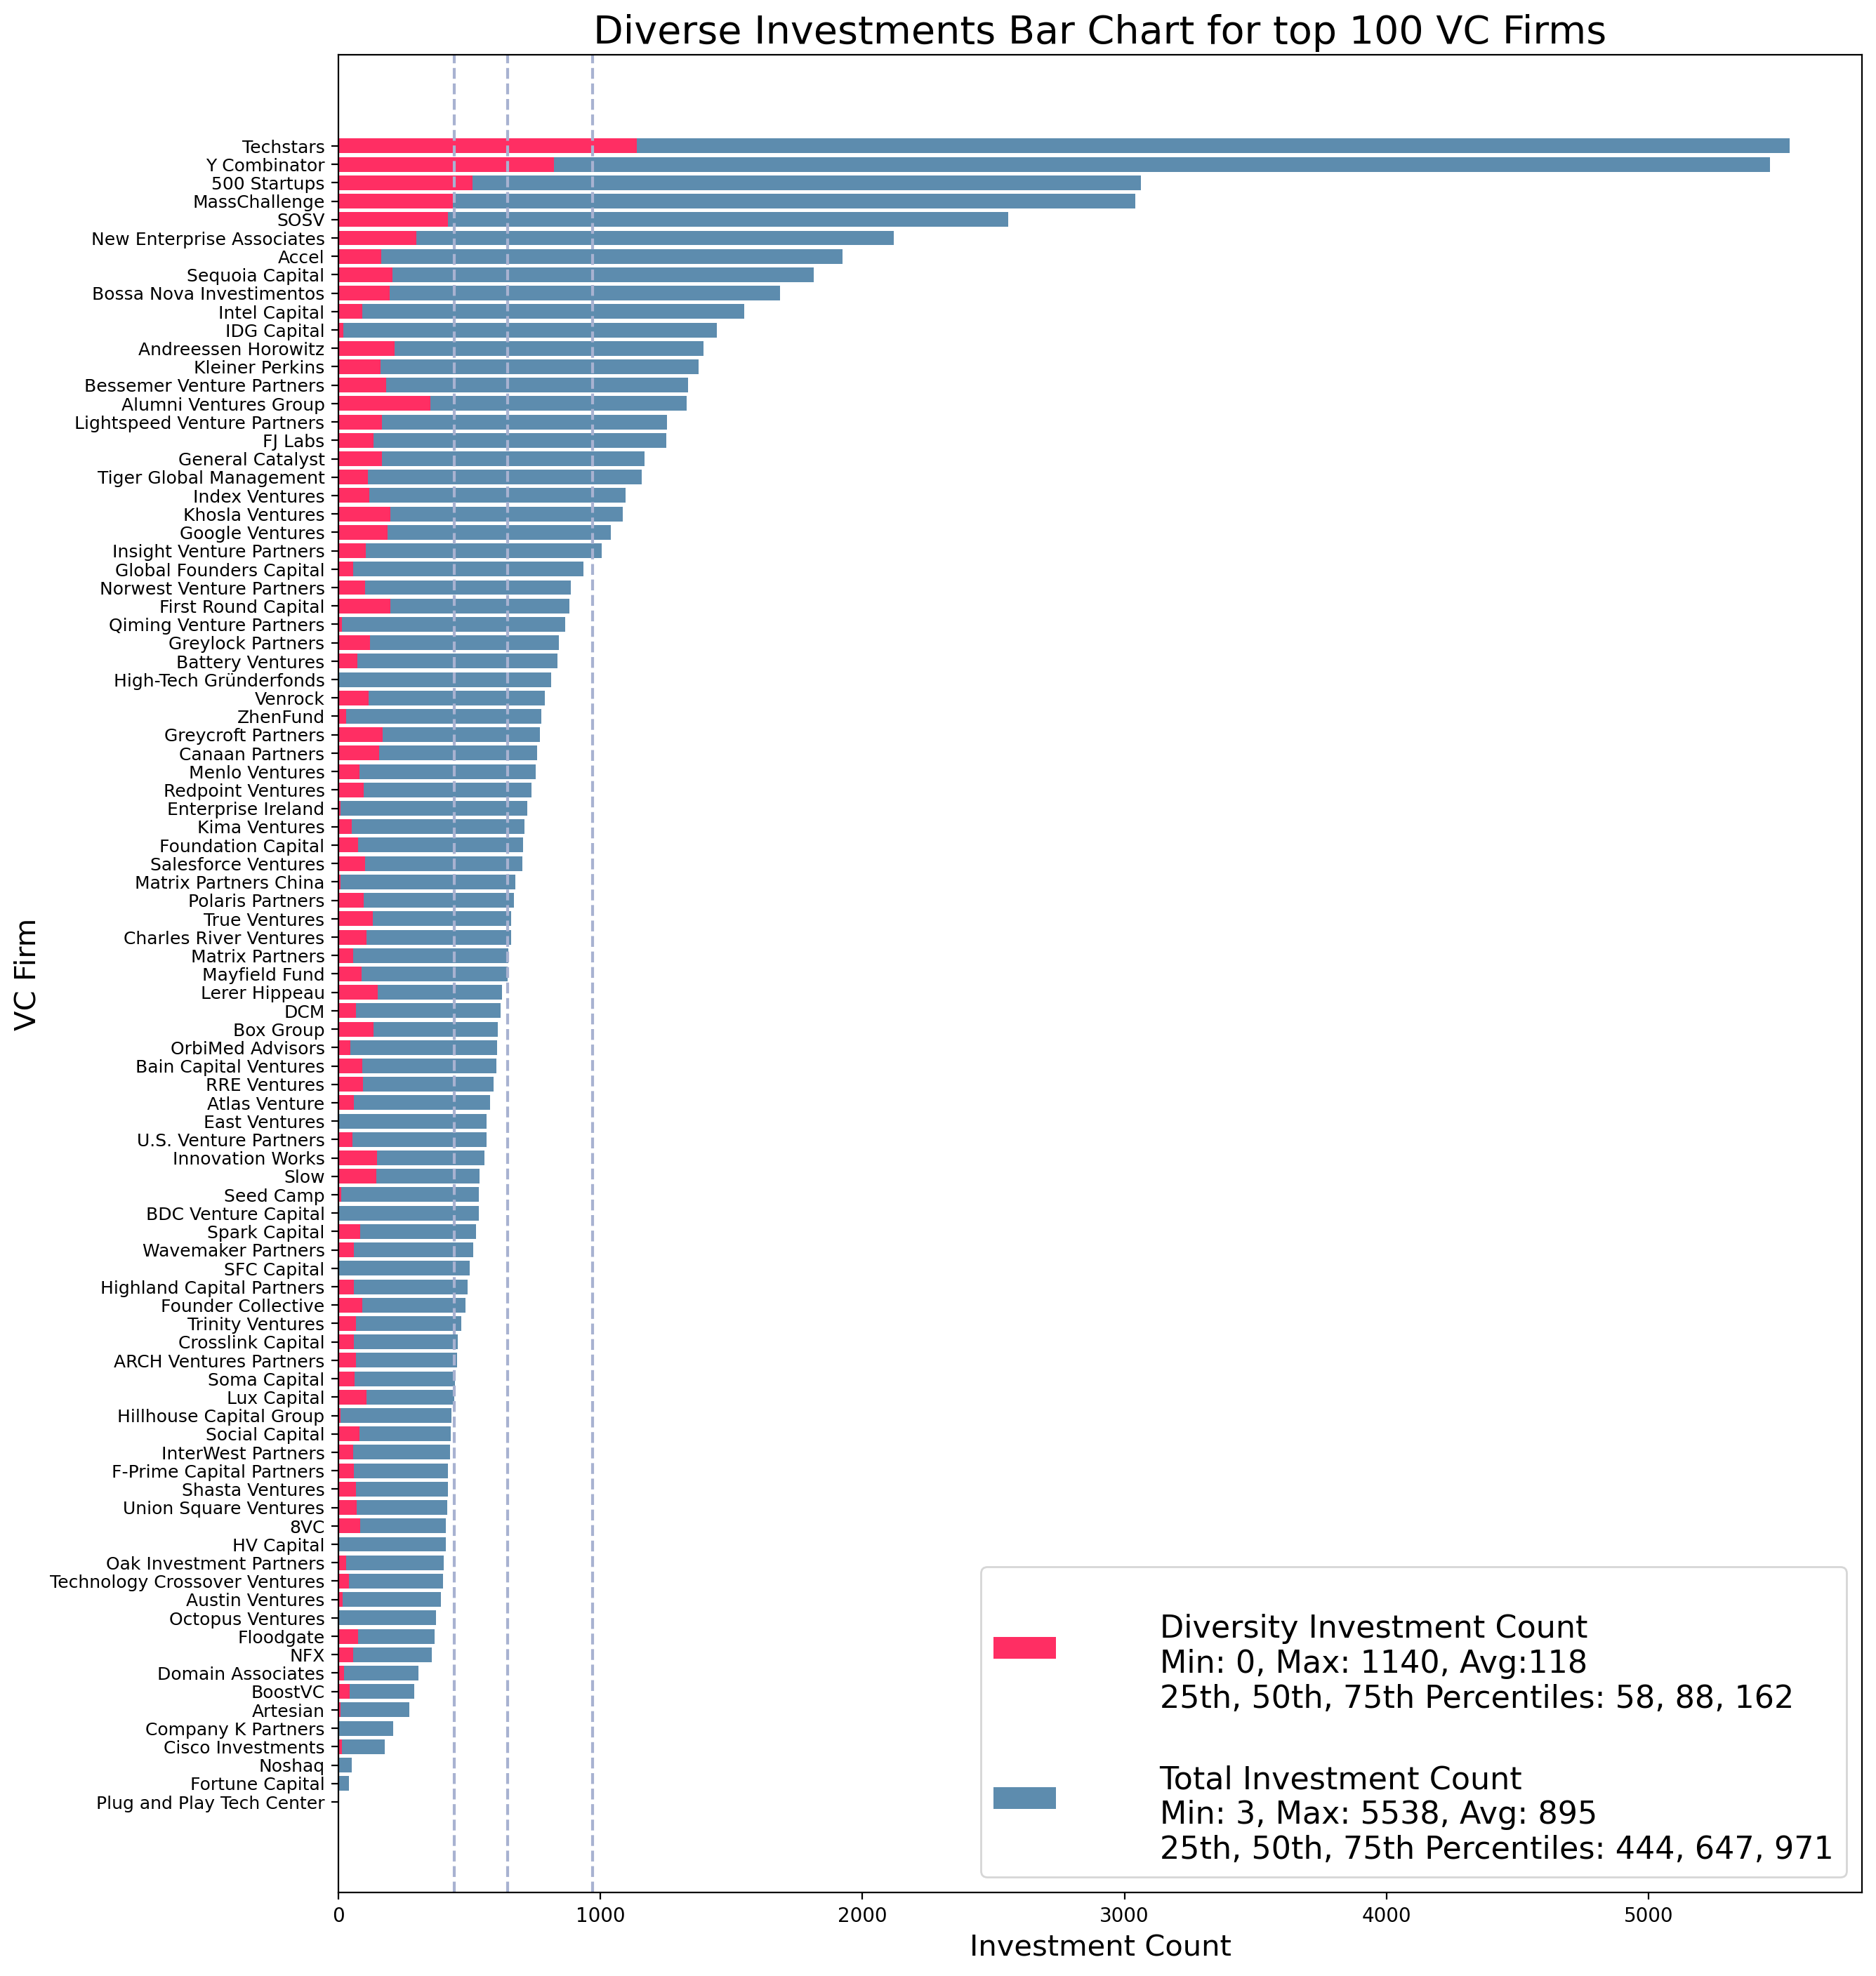

In [70]:
# combine all three charts
# width = 0.3
fig, ax = plt.subplots(figsize=(14, 17))

ax.barh(
    df_sorted["VC Firm"],
    df_sorted["Diversity Investment Count"],
    color="#ff2e63",
)
ax.barh(
    df_sorted["VC Firm"],
    df_sorted["Nondiversity Investment Count"],
    color="#5D8CAE",
    left=df_sorted["Diversity Investment Count"],
)
ax.set_title("Diverse Investments Bar Chart for top 100 VC Firms", fontsize=20)
ax.set_ylabel("VC Firm", fontsize=15)
ax.set_xlabel("Investment Count", fontsize=15)
ax.tick_params(axis="y", labelsize=9)
ax.legend(
    [
        f"""
        Diversity Investment Count
        Min: 0, Max: 1140, Avg:118
        25th, 50th, 75th Percentiles: 58, 88, 162""",
        f"""
        Total Investment Count
        Min: 3, Max: 5538, Avg: 895
        25th, 50th, 75th Percentiles: 444, 647, 971""",
    ],
    loc="lower right",
    fontsize=16,
)
pv_75 = np.percentile(df_sorted["Total Investment Count"], 75)
pv_50 = np.percentile(df_sorted["Total Investment Count"], 50)
pv_25 = np.percentile(df_sorted["Total Investment Count"], 25)
ax.axvline(pv_75, color="#A8B2D1", linestyle="--")
ax.axvline(pv_50, color="#A8B2D1", linestyle="--")
ax.axvline(pv_25, color="#A8B2D1", linestyle="--")

# dpv_75 = np.percentile(df_sorted_di["Diversity Investment Count"], 75)
# dpv_50 = np.percentile(df_sorted_di["Diversity Investment Count"], 50)
# dpv_25 = np.percentile(df_sorted_di["Diversity Investment Count"], 25)
# ax.axvline(dpv_75, color="#F5A9A9", linestyle="--")
# ax.axvline(dpv_50, color="#F5A9A9", linestyle="--")
# ax.axvline(dpv_25, color="#F5A9A9", linestyle="--")

plt.gca().invert_yaxis()
plt.show()


In [71]:
# save the figure
fig.savefig(
    "../30_results/Diverse Investments Bar Chart for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)

#### Graph 4: Boxplot

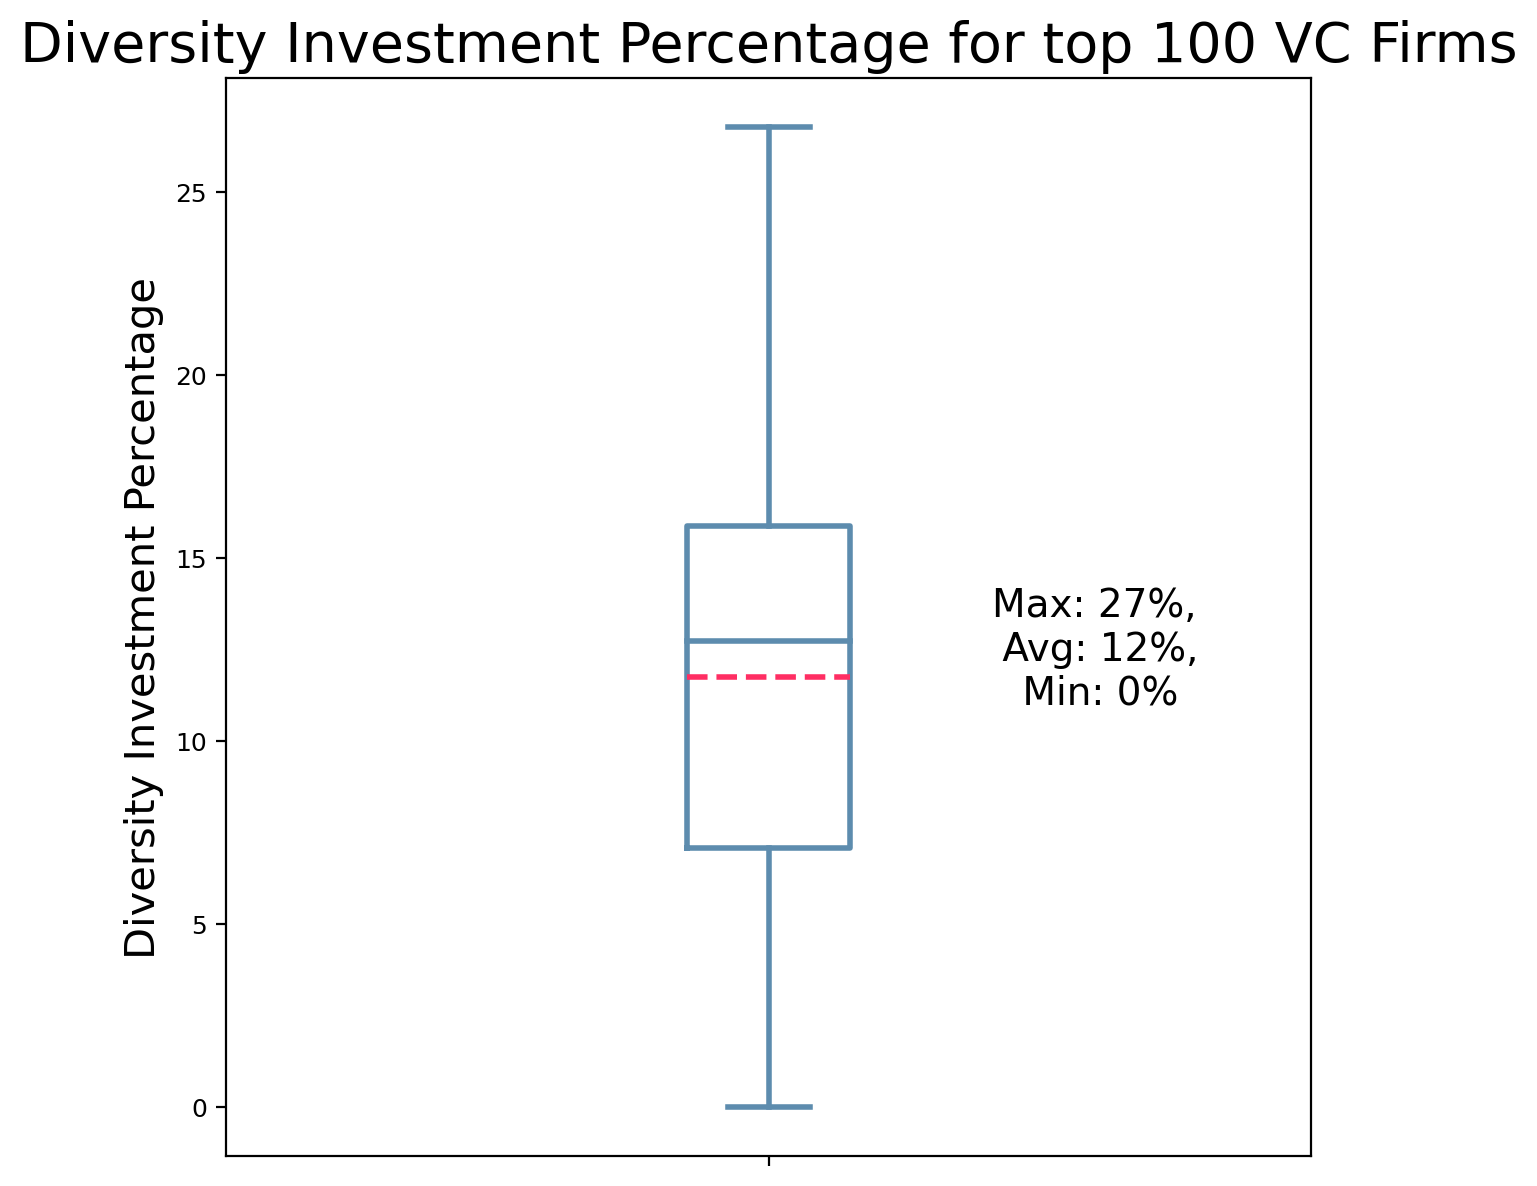

In [72]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.boxplot(
    df_sorted_dip["DIP: Diversity Investment Percentage"]
    .dropna()
    .values.reshape(-1, 1),
    vert=True,
    showmeans=True,
    meanline=True,
    meanprops={"color": "#ff2e63", "linewidth": 2},
    medianprops={"color": "#5D8CAE", "linewidth": 2},
    whiskerprops={"color": "#5D8CAE", "linewidth": 2},
    capprops={"color": "#5D8CAE", "linewidth": 2},
    flierprops={"color": "#5D8CAE", "linewidth": 2},
    boxprops={"color": "#5D8CAE", "linewidth": 2},
)
ax.set_title(
    "Diversity Investment Percentage for top 100 VC Firms", fontsize=20
)
ax.set_ylabel("Diversity Investment Percentage", fontsize=15)
ax.tick_params(axis="y", labelsize=9)
ax.set_xticklabels([""], fontsize=15)
ax.annotate(
    f"Max: 27%,\n Avg: 12%,\n Min: 0%", xy=(1.3, 11), ha="center", fontsize=14
)
plt.show()

In [73]:
# save the figure
fig.savefig(
    "../30_results/Diversity Investment Percentage for top 100 VC Firms Boxplot.png",
    dpi=300,
    bbox_inches="tight",
)

#### Graph 5: Metrics

In [74]:
metric_count = df["Metrics"].value_counts()


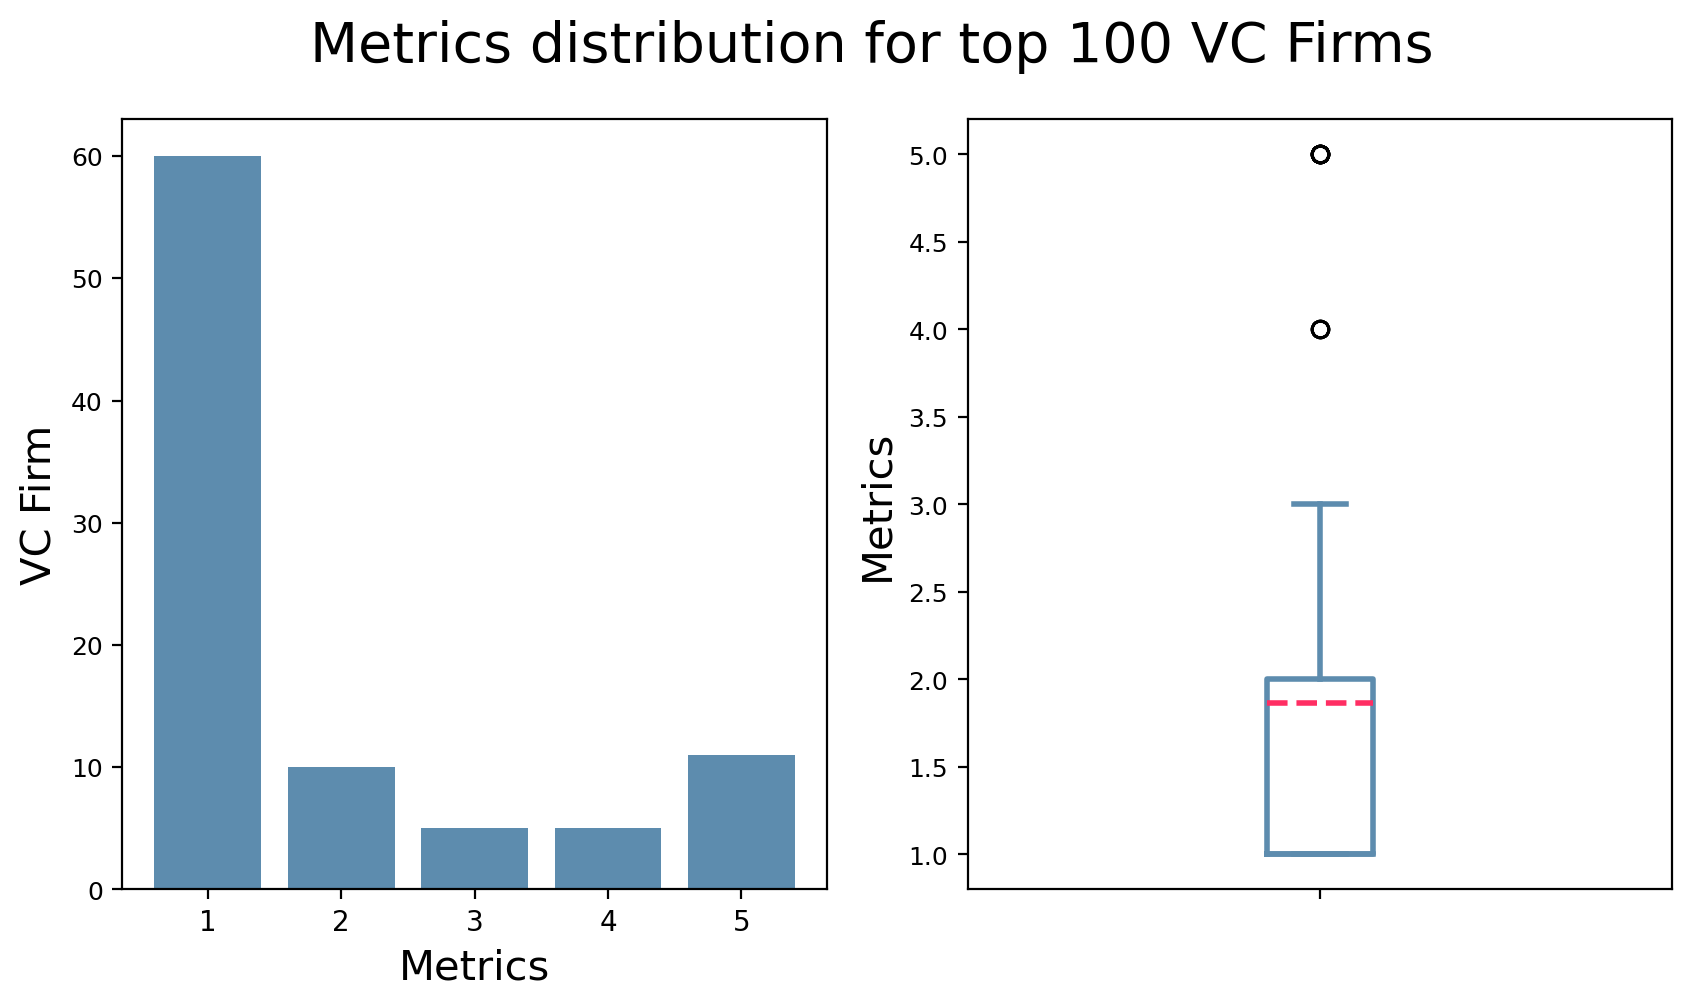

In [96]:
# create a bar chart and box plot of metrics
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Metrics distribution for top 100 VC Firms", fontsize=20)

ax[0].bar(
    metric_count.index,
    metric_count,
    color="#5D8CAE",
)
ax[0].set_ylabel("VC Firm", fontsize=15)
ax[0].set_xlabel("Metrics", fontsize=15)
ax[0].tick_params(axis="y", labelsize=9)

ax[1].boxplot(
    df["Metrics"],
    vert=True,
    showmeans=True,
    meanline=True,
    meanprops={"color": "#ff2e63", "linewidth": 2},
    medianprops={"color": "#5D8CAE", "linewidth": 2},
    whiskerprops={"color": "#5D8CAE", "linewidth": 2},
    capprops={"color": "#5D8CAE", "linewidth": 2},
    flierprops={"color": "#5D8CAE", "linewidth": 2},
    boxprops={"color": "#5D8CAE", "linewidth": 2},
)
ax[1].set_xticklabels("", fontsize=15)
ax[1].set_ylabel("Metrics", fontsize=15)
ax[1].tick_params(axis="y", labelsize=9)
plt.show()

In [97]:
# save the figure
fig.savefig(
    "../30_results/Metrics distribution for top 100 VC Firms.png",
    dpi=300,
    bbox_inches="tight",
)


### Summary Statistics

In [77]:
df_sorted["Total Investment Count"].describe()


count      91.000000
mean      894.681319
std       894.303949
min         3.000000
25%       443.000000
50%       646.000000
75%       970.000000
max      5538.000000
Name: Total Investment Count, dtype: float64

In [78]:
df_sorted["Diversity Investment Count"].describe()


count      91.000000
mean      117.604396
std       162.914966
min         0.000000
25%        41.500000
50%        80.000000
75%       139.500000
max      1140.000000
Name: Diversity Investment Count, dtype: float64

### Import Crunchbase Data

In [79]:
cb_df = pd.read_csv("../00_source_data/baseventures.csv")


In [80]:
cb_df.head()

,Announced Date,Organization Name,Diversity Spotlight (US Headquarters Only),Funding Round,Money Raised
0,14-Oct-21,Space Perspective,"Women Founded, Women Led",Series A - Space Perspective,$41M
1,9-Nov-20,Space Perspective,"Women Founded, Women Led",Seed Round - Space Perspective,$7M
2,17-Apr-19,Mos,"Middle Eastern / North African Founded, Middle...",Seed Round - Mos,$4M
3,1-Mar-18,Frank Darling,"Women Founded, Women Led",Pre Seed Round - Frank Darling,-
4,19-Sep-17,May Mobility,Women Founded,Seed Round - May Mobility,-


In [81]:
cb_df.describe()

,Announced Date,Organization Name,Diversity Spotlight (US Headquarters Only),Funding Round,Money Raised
count,34,34,34,34,34
unique,34,31,9,33,19
top,14-Oct-21,Space Perspective,Women Founded,Series B - OrderWithMe,-
freq,1,2,10,2,13


In [82]:
cb_df.fillna(0, inplace=True)


In [83]:
def money_to_float(moneystring):
    if isinstance(moneystring, int):  # Handle cases where input is an integer
        moneystring = str(moneystring)
    if "—" in moneystring:
        return 0
    elif moneystring == 0:
        return 0
    elif "M" in moneystring:
        return (
            float(
                moneystring.replace("$", "").replace(",", "").replace("M", "")
            )
            * 1_000_000
        )

    elif "K" in moneystring:
        return (
            float(
                moneystring.replace("$", "").replace(",", "").replace("K", "")
            )
            * 1_000
        )
    # else:
    #     return 0


In [84]:
cb_df["Amount Raised"] = cb_df["Money Raised"].apply(money_to_float)

In [85]:
cb_df.head()


,Announced Date,Organization Name,Diversity Spotlight (US Headquarters Only),Funding Round,Money Raised,Amount Raised
0,14-Oct-21,Space Perspective,"Women Founded, Women Led",Series A - Space Perspective,$41M,41000000.0
1,9-Nov-20,Space Perspective,"Women Founded, Women Led",Seed Round - Space Perspective,$7M,7000000.0
2,17-Apr-19,Mos,"Middle Eastern / North African Founded, Middle...",Seed Round - Mos,$4M,4000000.0
3,1-Mar-18,Frank Darling,"Women Founded, Women Led",Pre Seed Round - Frank Darling,-,NaN
4,19-Sep-17,May Mobility,Women Founded,Seed Round - May Mobility,-,NaN


In [86]:
# group by diversity spotlight
cb_group = cb_df.groupby("Diversity Spotlight (US Headquarters Only)").sum()


/var/folders/rp/l0l3mhgx4zs1vfg5y9_c2qw80000gn/T/ipykernel_3527/3973399824.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cb_group = cb_df.groupby("Diversity Spotlight (US Headquarters Only)").sum()


In [87]:
cb_group.reset_index(inplace=True)


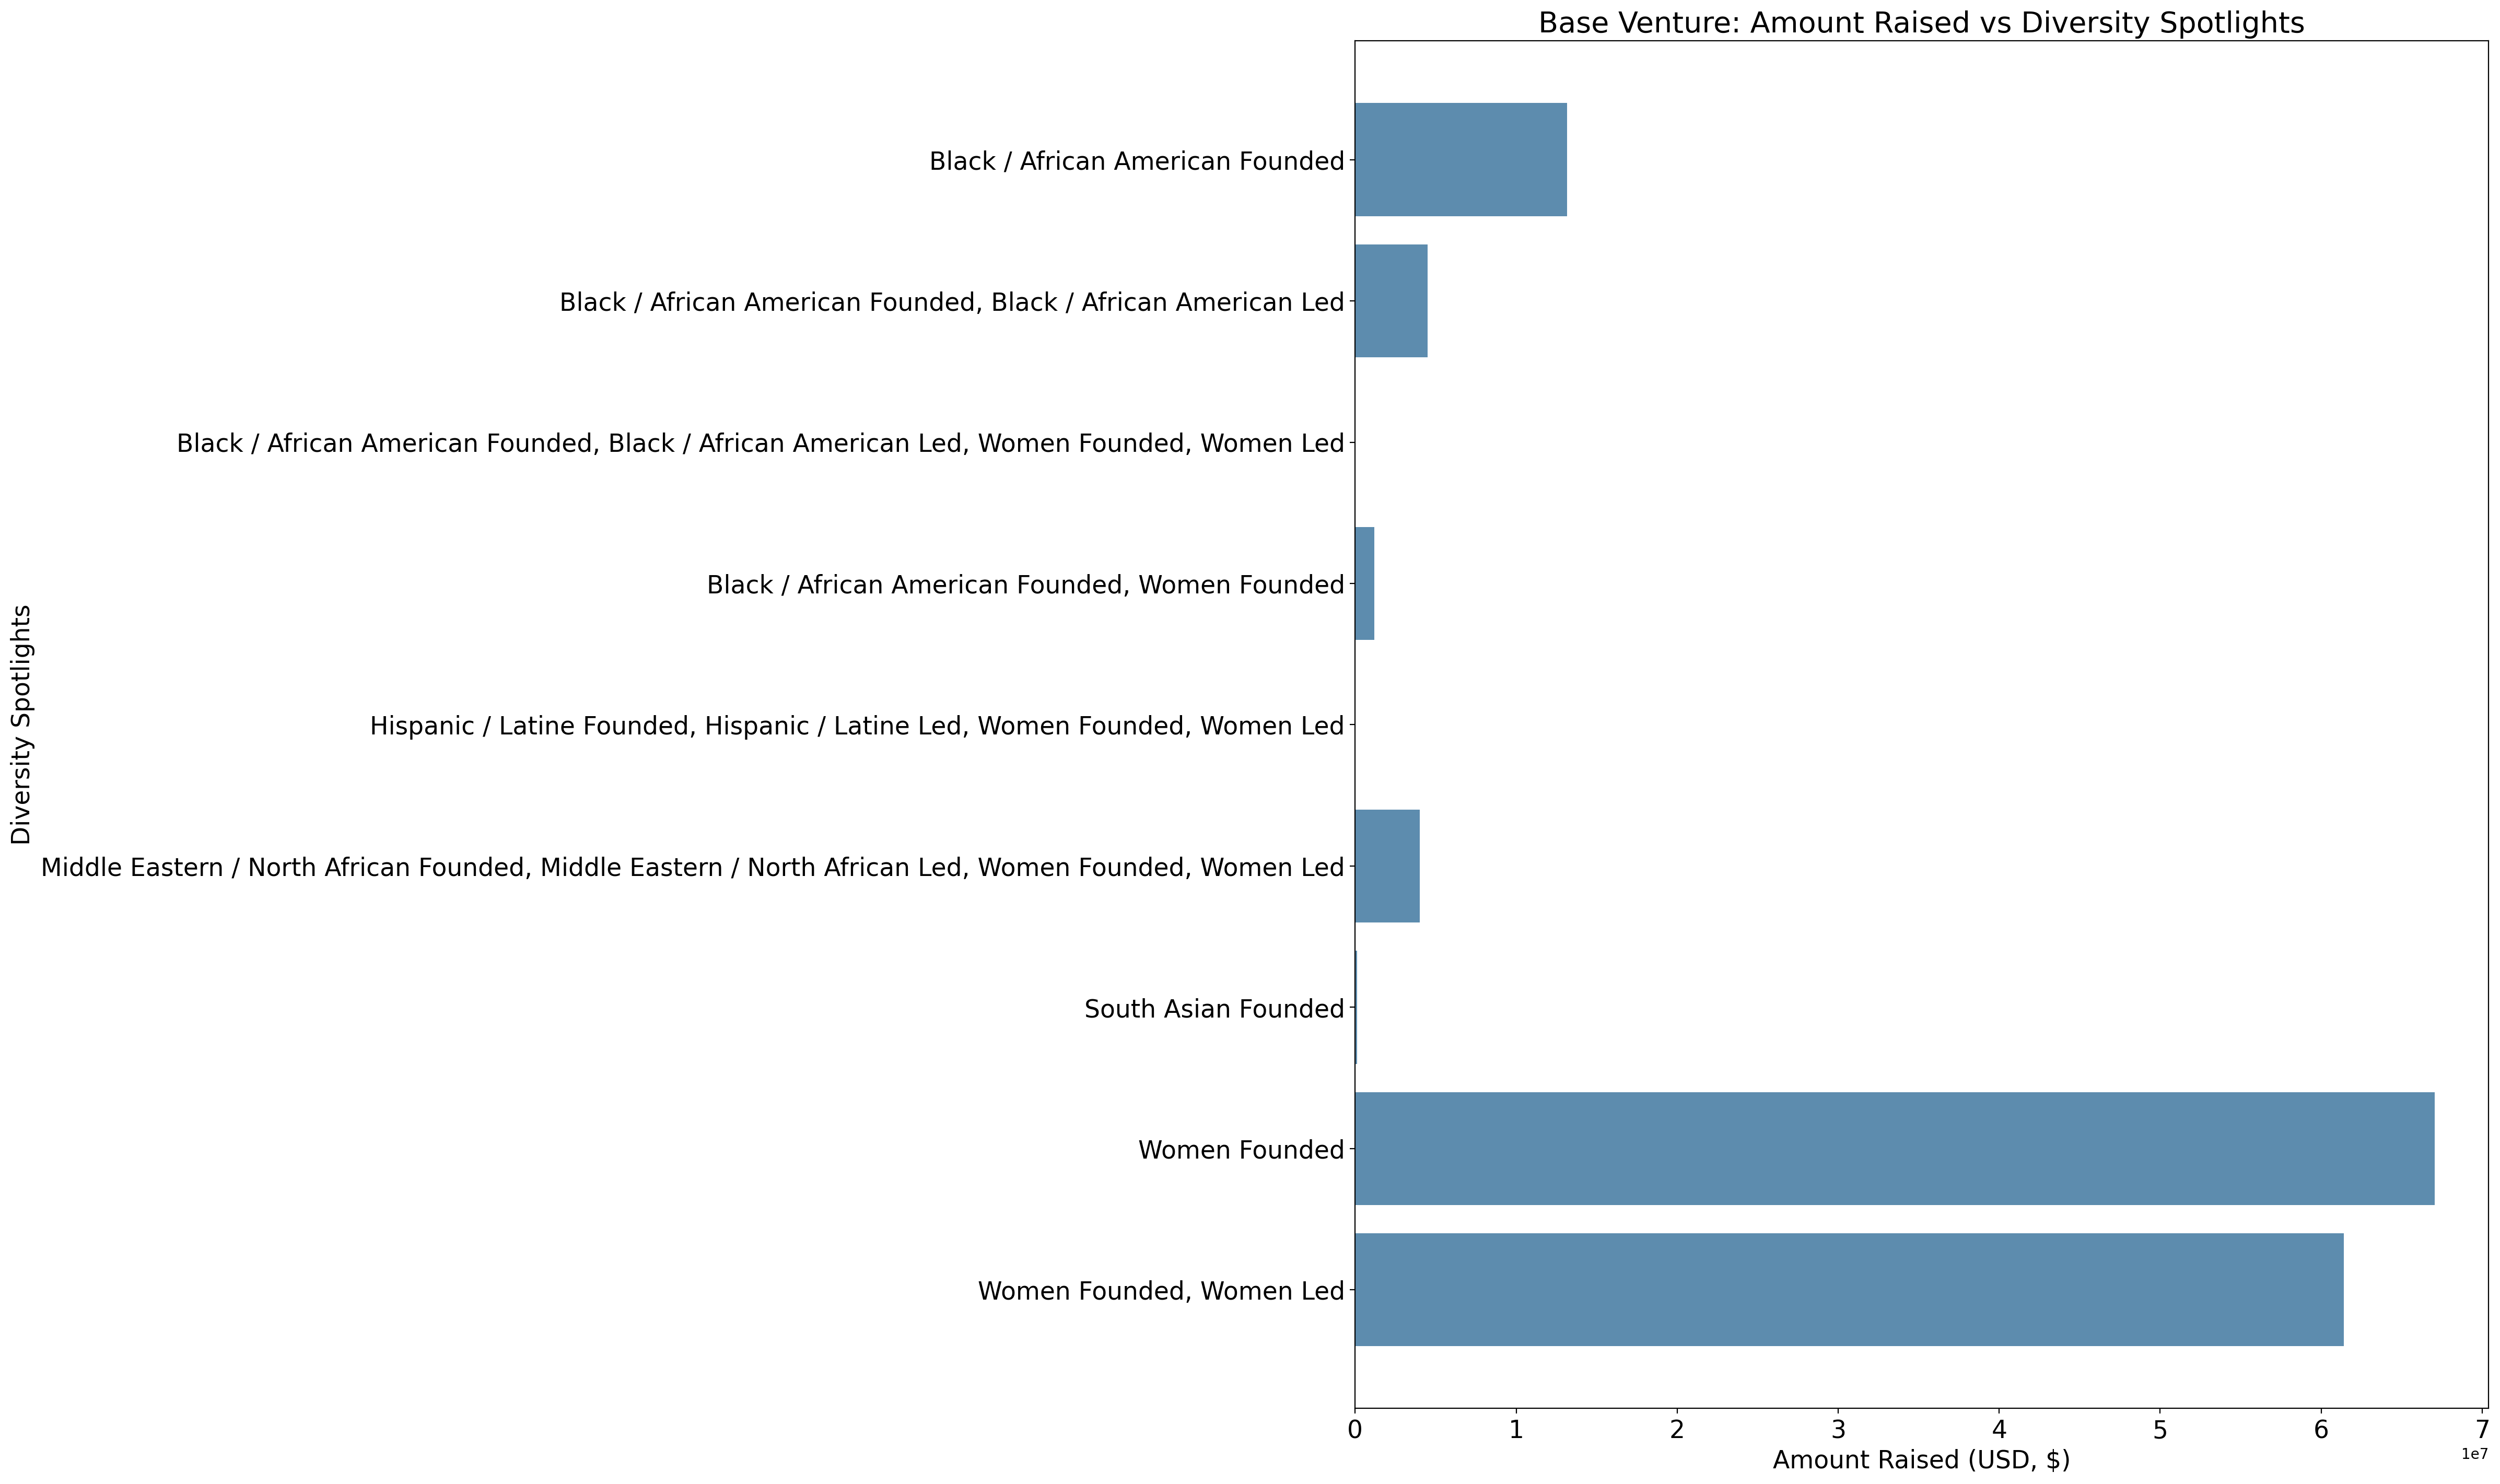

In [88]:
# create a bar chart of amount raised vs diversity spotlights
fig, ax = plt.subplots(figsize=(14, 17))
ax.barh(
    cb_group["Diversity Spotlight (US Headquarters Only)"],
    cb_group["Amount Raised"],
    color="#5D8CAE",
)

ax.set_title(
    "Base Venture: Amount Raised vs Diversity Spotlights", fontsize=20
)
ax.set_xlabel("Amount Raised (USD, $)", fontsize=17)
ax.set_ylabel("Diversity Spotlights", fontsize=17)
ax.tick_params(labelsize=17)
# ax.ticklabel_format(style = 'plain')
# ax.legend()
plt.gca().invert_yaxis()
plt.show()

In [89]:
# save the figure
fig.savefig(
    "../30_results/Base Venture: Amount Raised vs Diversity Spotlights.png",
    dpi=300,
    bbox_inches="tight",
)
